In [123]:
# 1°) Importamos las librerias a utilizar
## PYTHON ##
import pandas as pd
import numpy as np
import datetime

# Para que me muestre los datos completos y no salgan cortados
# le indico que ancho de las columnas
pd.options.display.max_colwidth = None  #con None es para todos los caracteres posibles

## VISUALIZACIONES ##
import matplotlib.pyplot as plt
import seaborn as sns

# 1° Dataset: FLIGHTS

In [124]:
# Lectura del fichero
df_flights = pd.read_csv("C:/Users/Santiago/Desktop/EDA Riccardi Santiago/src/data/flights.csv")
df_flights

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020


In [125]:
# Analizamos como estan compuestos los datos y los tipos de variables
df_flights.sample(5)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
263184,131592,1295,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,08/05/2021
135959,67979,659,Rio de Janeiro (RJ),Sao Paulo (SP),firstClass,753.78,0.86,331.89,FlyingDrops,02/14/2021
261951,130975,1288,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,03/07/2022
241234,120617,1196,Florianopolis (SC),Sao Paulo (SP),firstClass,693.51,1.46,562.14,CloudFy,07/01/2021
79401,39700,384,Salvador (BH),Aracaju (SE),economic,811.73,2.16,830.86,CloudFy,03/08/2020


Verificamos la calidad de los datos, analizando n° de columnas, tipo de dato, datos nulos

In [126]:
# De que tipo son los datos
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [127]:
# Cantidad de filas y columnas
print(f'df_flights contiene --> filas:{df_flights.shape[0]} y columnas:{df_flights.shape[1]}')

df_flights contiene --> filas:271888 y columnas:10


9) **Tabla de Variables**

In [128]:
# Analisis estadistico de las variables
df_flights.describe(include="all")

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
count,271888.000000,271888.000000,271888,271888,271888,271888.00000,271888.000000,271888.000000,271888,271888
unique,NaN,NaN,9,9,3,NaN,NaN,NaN,3,999
top,NaN,NaN,Florianopolis (SC),Florianopolis (SC),firstClass,NaN,NaN,NaN,Rainbow,09/26/2019
freq,NaN,NaN,57317,57317,116418,NaN,NaN,NaN,116752,1335
mean,67971.500000,667.505495,NaN,NaN,NaN,957.37503,1.421147,546.955535,NaN,NaN
std,39243.724665,389.523127,NaN,NaN,NaN,362.31189,0.542541,208.851288,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,301.51000,0.440000,168.220000,NaN,NaN
25%,33985.750000,326.000000,NaN,NaN,NaN,672.66000,1.040000,401.660000,NaN,NaN
50%,67971.500000,659.000000,NaN,NaN,NaN,904.00000,1.460000,562.140000,NaN,NaN
75%,101957.250000,1011.000000,NaN,NaN,NaN,1222.24000,1.760000,676.530000,NaN,NaN


Descripción de las variables:
* **travelCode**: analizar en profundidad
* **userCode**: analizar en profundidad
* **from**: hay un total de 9 ciudades
* **to**: hay un total de 9 ciudades
* **flightType**: tenemos 3 tipos de clases de vuelo: ['firstClass', 'economic', 'premium']
* **price**: R$ (real brasileño) el max valor de un pasaje fue de R$ 1754.17 y el min valor fue de R$ 301.51
* **time**: aunque esta en formato float representa el tiempo en horas,minutos 
* **distance**: su unidad es en km
* **agency**: tenemos 3 aerolineas: ['FlyingDrops', 'CloudFy', 'Rainbow']
* **date**: cambiar el formato y analizar

In [129]:
# Analizamos desde que rango de fecha son los datos:
print(f'Inicio: {pd.to_datetime(df_flights["date"]).min()}')
print(f'Fin: {pd.to_datetime(df_flights["date"]).max()}')

Inicio: 2019-09-26 00:00:00
Fin: 2023-07-24 00:00:00


In [130]:
# Analizamos que relacion tienen las variables 'travelCode' y 'userCode':
df_flights.groupby(['travelCode', 'userCode']).size()

travelCode  userCode
0           0           2
1           0           2
2           0           2
3           0           2
4           0           2
                       ..
135939      1339        2
135940      1339        2
135941      1339        2
135942      1339        2
135943      1339        2
Length: 135944, dtype: int64

In [131]:
travelCode_userCode = pd.DataFrame(df_flights.groupby(['travelCode','userCode']).size(),columns=['N° user Code x travelCode'])
travelCode_userCode

,,N° user Code x travelCode
travelCode,userCode,
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
135939,1339,2
135940,1339,2
135941,1339,2


In [132]:
travelCode_userCode = pd.DataFrame([df_flights.groupby(['travelCode', 'userCode']).size().max(),df_flights.groupby(['travelCode', 'userCode']).size().min(),'Cada travelCode siempre esta asociado con 2 userCode lo cual indica que todos los viajes son de ida y vuelta'],columns=["N° user Code x travelCode"],index=['Max userCode','Min userCode','Observaciones:'])
travelCode_userCode 

,N° user Code x travelCode
Max userCode,2
Min userCode,2
Observaciones:,Cada travelCode siempre esta asociado con 2 userCode lo cual indica que todos los viajes son de ida y vuelta


Observaciones:

In [133]:
# N° de Aerolineas
aerolineas=list(df_flights["agency"].unique())
print(aerolineas)

['FlyingDrops', 'CloudFy', 'Rainbow']


In [134]:
# N° de FlightType
flight_type = list(df_flights["flightType"].unique())
print(flight_type) 

['firstClass', 'economic', 'premium']


In [135]:
# N° de Ciudades (con to o from)
ciudades = list(df_flights["from"].unique())
print(ciudades)

['Recife (PE)', 'Florianopolis (SC)', 'Brasilia (DF)', 'Aracaju (SE)', 'Salvador (BH)', 'Campo Grande (MS)', 'Sao Paulo (SP)', 'Natal (RN)', 'Rio de Janeiro (RJ)']


C:\Users\Santiago\AppData\Local\Temp\ipykernel_7180\3153855133.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_flights.corr(), annot=True)


<AxesSubplot: >

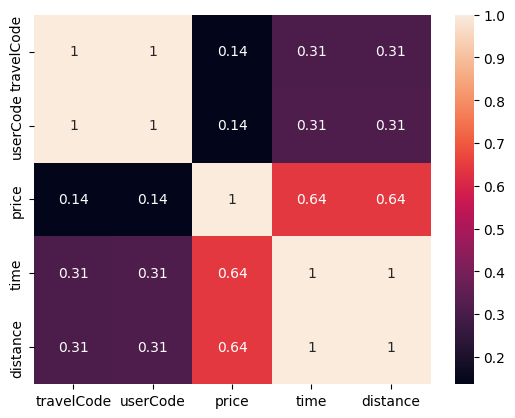

In [136]:
# Heatmap/Mapa de Correlación
sns.heatmap(df_flights.corr(), annot=True)

Observaciones:

### 3. Data Cleaning

**Missings/Valores nulos**

In [137]:
df_flights.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [138]:
df_flights.isna().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

Observaciones: no hay datos nulos 

**Outliers**

Histogramas

<AxesSubplot: xlabel='price', ylabel='Count'>

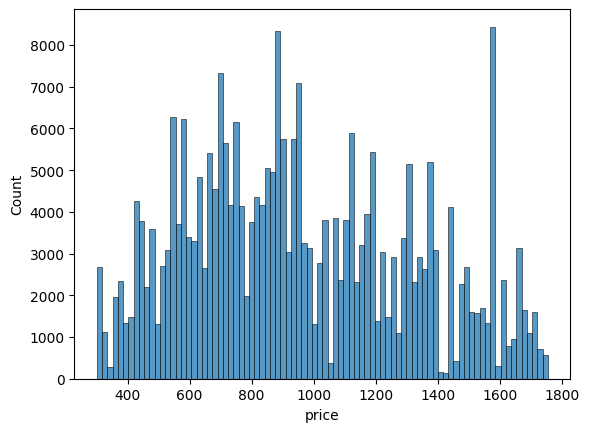

In [139]:
sns.histplot(data=df_flights, x='price')

Densidad

C:\Users\Santiago\AppData\Local\Temp\ipykernel_7180\175360050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_flights["price"], hist = False);


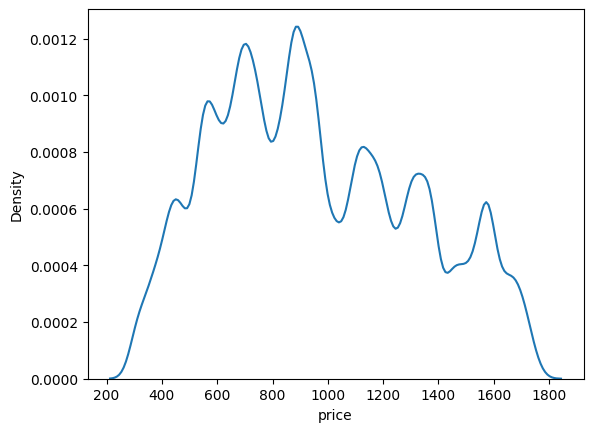

In [140]:
sns.distplot(df_flights["price"], hist = False);

Diagramas de caja

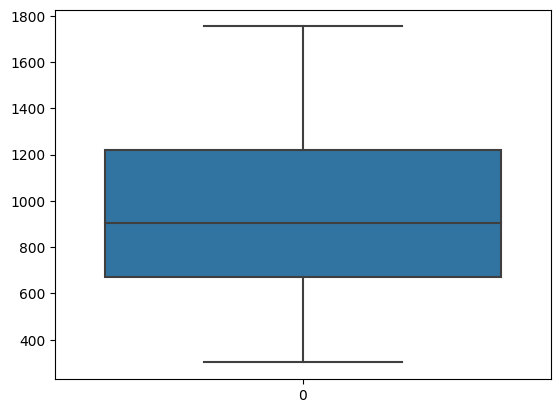

In [141]:
sns.boxplot(df_flights["price"]);

**Transformaciones**

In [142]:
# Creamos columna year-month-day" para leer y manipular la fecha:
df_flights["year-month-day"] = pd.to_datetime(df_flights["date"])
# Para obtener el año y mes
df_flights['year-month'] = pd.to_datetime(df_flights['year-month-day']).dt.to_period('M')

# Para obtener el año
#df_flights['year'] = pd.to_datetime(df_flights['year-month-day']).dt.year

# Para obtener el mes
#df_flights['month'] = pd.to_datetime(df_flights['year-month-day']).dt.month

# Para obtener el dia
#df_flights['day'] = pd.to_datetime(df_flights['year-month-day']).dt.day

In [143]:
# Ordenamos el DF por fecha 
df_flights.sort_values(by=['year-month-day'])

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,year-month-day,year-month
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,2019-09-26,2019-09
242276,121138,1202,Florianopolis (SC),Natal (RN),firstClass,1315.27,1.84,709.37,CloudFy,09/26/2019,2019-09-26,2019-09
264152,132076,1301,Florianopolis (SC),Salvador (BH),premium,1311.38,2.44,937.77,CloudFy,09/26/2019,2019-09-26,2019-09
57808,28904,276,Recife (PE),Rio de Janeiro (RJ),economic,908.93,2.30,885.57,Rainbow,09/26/2019,2019-09-26,2019-09
177390,88695,877,Aracaju (SE),Natal (RN),firstClass,598.61,0.46,176.33,CloudFy,09/26/2019,2019-09-26,2019-09
...,...,...,...,...,...,...,...,...,...,...,...,...
158103,79051,766,Brasilia (DF),Natal (RN),firstClass,1434.91,1.43,550.69,Rainbow,07/21/2023,2023-07-21,2023-07
86565,43282,422,Rio de Janeiro (RJ),Aracaju (SE),firstClass,1381.55,1.55,597.61,FlyingDrops,07/21/2023,2023-07-21,2023-07
187725,93862,925,Salvador (BH),Florianopolis (SC),firstClass,1616.44,2.44,937.77,FlyingDrops,07/23/2023,2023-07-23,2023-07
117319,58659,571,Recife (PE),Campo Grande (MS),premium,793.15,1.39,535.40,CloudFy,07/24/2023,2023-07-24,2023-07


In [144]:
# Tomamos un rango de fechas para hacer el analisis: 2019-09-26 hasta 2022-09-26
df_flights = df_flights.loc[(df_flights['year-month-day'] >= '2019-09-26') & (df_flights['year-month-day'] <= '2022-09-26')]
# Ordenamos el DF por fecha: de menor a mayor 
df_flights  = df_flights.sort_values(by=['year-month-day'])
df_flights

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,year-month-day,year-month
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,2019-09-26,2019-09
216096,108048,1072,Florianopolis (SC),Campo Grande (MS),economic,478.02,1.49,573.81,CloudFy,09/26/2019,2019-09-26,2019-09
215880,107940,1071,Florianopolis (SC),Brasilia (DF),firstClass,1087.18,1.66,637.56,Rainbow,09/26/2019,2019-09-26,2019-09
37688,18844,186,Brasilia (DF),Natal (RN),premium,1107.52,1.43,550.69,Rainbow,09/26/2019,2019-09-26,2019-09
215592,107796,1070,Florianopolis (SC),Campo Grande (MS),firstClass,857.32,1.49,573.81,Rainbow,09/26/2019,2019-09-26,2019-09
...,...,...,...,...,...,...,...,...,...,...,...,...
244153,122076,1210,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,09/26/2022,2022-09-26,2022-09
240669,120334,1193,Campo Grande (MS),Florianopolis (SC),economic,808.63,1.49,573.81,CloudFy,09/26/2022,2022-09-26,2022-09
235475,117737,1165,Brasilia (DF),Florianopolis (SC),firstClass,1569.65,1.66,637.56,FlyingDrops,09/26/2022,2022-09-26,2022-09
50093,25046,242,Brasilia (DF),Aracaju (SE),economic,654.88,1.11,425.98,CloudFy,09/26/2022,2022-09-26,2022-09


In [145]:
df_flights[df_flights['travelCode']==0]

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,year-month-day,year-month
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,2019-09-26,2019-09
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,2019-09-30,2019-09


In [146]:
# Modificar nombres de columnas:
# price-->price_flight
# agency-->airline

In [147]:
# Creamos una columna con el nombre del dia de la semana
df_flights["day_of_week"] =df_flights["year-month-day"].dt.day_name()
df_flights

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,year-month-day,year-month,day_of_week
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,2019-09-26,2019-09,Thursday
216096,108048,1072,Florianopolis (SC),Campo Grande (MS),economic,478.02,1.49,573.81,CloudFy,09/26/2019,2019-09-26,2019-09,Thursday
215880,107940,1071,Florianopolis (SC),Brasilia (DF),firstClass,1087.18,1.66,637.56,Rainbow,09/26/2019,2019-09-26,2019-09,Thursday
37688,18844,186,Brasilia (DF),Natal (RN),premium,1107.52,1.43,550.69,Rainbow,09/26/2019,2019-09-26,2019-09,Thursday
215592,107796,1070,Florianopolis (SC),Campo Grande (MS),firstClass,857.32,1.49,573.81,Rainbow,09/26/2019,2019-09-26,2019-09,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244153,122076,1210,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,09/26/2022,2022-09-26,2022-09,Monday
240669,120334,1193,Campo Grande (MS),Florianopolis (SC),economic,808.63,1.49,573.81,CloudFy,09/26/2022,2022-09-26,2022-09,Monday
235475,117737,1165,Brasilia (DF),Florianopolis (SC),firstClass,1569.65,1.66,637.56,FlyingDrops,09/26/2022,2022-09-26,2022-09,Monday
50093,25046,242,Brasilia (DF),Aracaju (SE),economic,654.88,1.11,425.98,CloudFy,09/26/2022,2022-09-26,2022-09,Monday


In [160]:
df_flights.day_of_week.unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday'], dtype=object)